In [487]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import pandas as pd
from scipy import io

In [10]:
import warnings
warnings.simplefilter("ignore")

In [11]:
from keras import backend as K
K.set_image_dim_ordering('tf') # note that we need to have tensorflow dimension ordering still because of the weigths.
print('The backend is:',K.backend())
import tensorflow as tf
print(K.image_dim_ordering()) # should say tf
print(tf.__version__) # tested for 1.11.0

import keras
print(keras.__version__) # tested for 2.2.4

The backend is: tensorflow
tf
1.11.0
2.2.4


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, time
import matplotlib.pyplot as plt
#from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16,ResNet50
#from keras.applications.vgg16 import preprocess_input
import os

## MNIST

In [129]:
### load dataset
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()

In [130]:
train_X.shape, test_X.shape

((60000, 28, 28), (10000, 28, 28))

In [131]:
classes = np.unique(train_Y)
num_classes = len(classes)
num_classes

10

In [132]:
# Normalise the data and change data type
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [133]:
train_X.shape

(60000, 28, 28)

In [134]:
train_X = train_X.reshape(60000,28*28)
test_X = test_X.reshape(10000,28*28)

In [135]:
# Converting Labels to one hot encoded format
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [136]:
'''
# Splitting train data as train and validation data
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
                                                           train_Y_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )
'''

'\n# Splitting train data as train and validation data\ntrain_X,valid_X,train_label,valid_label = train_test_split(train_X,\n                                                           train_Y_one_hot,\n                                                           test_size=0.2,\n                                                           random_state=13\n                                                           )\n'

In [137]:
# Finally check the data size whether it is as per tensorflow and ResNet requirement
#train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

In [138]:
train_X.shape,train_label.shape

((60000, 784), (48000, 10))

In [139]:
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Activation

### SGD

In [140]:
# Initialize model constructor
model = Sequential()
# Add layers sequentially
model.add(Dense(128, input_shape=(784,), use_bias = False))
model.add(Activation("relu"))
# Third..
#model.add(Dense(128, use_bias = False))
#model.add(Activation("relu"))

model.add(Dense(10, use_bias = False))
model.add(Activation("softmax"))

In [141]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100352    
_________________________________________________________________
activation_12 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1280      
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
Total params: 101,632
Trainable params: 101,632
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [143]:
history = model.fit(train_X, train_Y_one_hot, epochs = 150, batch_size = 32, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 6s 115us/step - loss: 0.7362 - acc: 0.8188 - val_loss: 0.3814 - val_acc: 0.8975
Epoch 2/150
48000/48000 [==============================] - 4s 89us/step - loss: 0.3647 - acc: 0.9001 - val_loss: 0.3103 - val_acc: 0.9128
Epoch 3/150
48000/48000 [==============================] - 4s 73us/step - loss: 0.3109 - acc: 0.9132 - val_loss: 0.2757 - val_acc: 0.9223
Epoch 4/150
48000/48000 [==============================] - 3s 71us/step - loss: 0.2786 - acc: 0.9219 - val_loss: 0.2545 - val_acc: 0.9284
Epoch 5/150
48000/48000 [==============================] - 4s 77us/step - loss: 0.2545 - acc: 0.9288 - val_loss: 0.2341 - val_acc: 0.9343
Epoch 6/150
48000/48000 [==============================] - 3s 70us/step - loss: 0.2352 - acc: 0.9335 - val_loss: 0.2194 - val_acc: 0.9388
Epoch 7/150
48000/48000 [==============================] - 3s 72us/step - loss: 0.2190 - acc: 0.9383 - val_loss: 0.2076 -

48000/48000 [==============================] - 7s 137us/step - loss: 0.0449 - acc: 0.9891 - val_loss: 0.0878 - val_acc: 0.9741
Epoch 60/150
48000/48000 [==============================] - 7s 151us/step - loss: 0.0441 - acc: 0.9895 - val_loss: 0.0870 - val_acc: 0.9742
Epoch 61/150
48000/48000 [==============================] - 8s 162us/step - loss: 0.0433 - acc: 0.9898 - val_loss: 0.0867 - val_acc: 0.9744
Epoch 62/150
48000/48000 [==============================] - 8s 161us/step - loss: 0.0426 - acc: 0.9898 - val_loss: 0.0864 - val_acc: 0.9740
Epoch 63/150
48000/48000 [==============================] - 8s 159us/step - loss: 0.0417 - acc: 0.9900 - val_loss: 0.0869 - val_acc: 0.9748
Epoch 64/150
48000/48000 [==============================] - 7s 156us/step - loss: 0.0410 - acc: 0.9903 - val_loss: 0.0859 - val_acc: 0.9748
Epoch 65/150
48000/48000 [==============================] - 8s 161us/step - loss: 0.0404 - acc: 0.9906 - val_loss: 0.0865 - val_acc: 0.9748
Epoch 66/150
48000/48000 [=======

48000/48000 [==============================] - 6s 131us/step - loss: 0.0184 - acc: 0.9975 - val_loss: 0.0819 - val_acc: 0.9768
Epoch 118/150
48000/48000 [==============================] - 7s 140us/step - loss: 0.0182 - acc: 0.9975 - val_loss: 0.0819 - val_acc: 0.9761
Epoch 119/150
48000/48000 [==============================] - 6s 131us/step - loss: 0.0180 - acc: 0.9977 - val_loss: 0.0821 - val_acc: 0.9762
Epoch 120/150
48000/48000 [==============================] - 6s 125us/step - loss: 0.0177 - acc: 0.9977 - val_loss: 0.0817 - val_acc: 0.9762
Epoch 121/150
48000/48000 [==============================] - 6s 128us/step - loss: 0.0175 - acc: 0.9978 - val_loss: 0.0825 - val_acc: 0.9763
Epoch 122/150
48000/48000 [==============================] - 6s 128us/step - loss: 0.0173 - acc: 0.9979 - val_loss: 0.0822 - val_acc: 0.9760
Epoch 123/150
48000/48000 [==============================] - 5s 106us/step - loss: 0.0171 - acc: 0.9978 - val_loss: 0.0822 - val_acc: 0.9764
Epoch 124/150
48000/48000 [

In [144]:
model.evaluate(valid_X,valid_label,verbose=0)[1]

0.995

In [147]:
def plot_loss_acc(hist):
    ''' 
    f, ax = plt.subplots()
    ax.plot([None] + hist.history['acc'], 'o-')
    ax.plot([None] + hist.history['val_acc'], 'x-')
    # Plot legend and use the best location automatically: loc = 0.
    ax.legend(['Train acc', 'Validation acc'], loc = 0)
    ax.set_title('Training/Validation acc per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Acc') 
    plt.plot()
    ''' 
    f, ax = plt.subplots()
    #ax.plot([None] + hist.history['loss'], 'o-',c='r')
    ax.plot([None] + hist.history['val_loss'], '-',c='g')
    # Plot legend and use the best location automatically: loc = 0.
    ax.legend(['Validation loss'], loc = 0)
    ax.set_title('Validation loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Acc') 
    plt.plot()

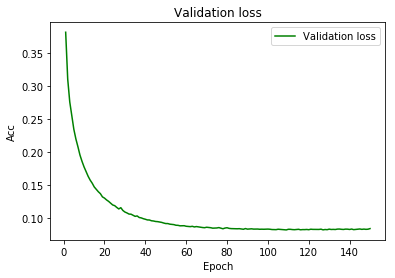

In [159]:
fig = plot_loss_acc(history)

### ADAM

In [149]:
# Initialize model constructor
model2 = Sequential()
# Add layers sequentially
model2.add(Dense(128, input_shape=(784,), use_bias = False))
model2.add(Activation("relu"))
# Third..
#model.add(Dense(128, use_bias = False))
#model.add(Activation("relu"))

model2.add(Dense(10, use_bias = False))
model2.add(Activation("softmax"))

In [150]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [151]:
history2 = model2.fit(train_X, train_Y_one_hot, epochs = 150, batch_size = 32, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 6s 117us/step - loss: 0.2902 - acc: 0.9175 - val_loss: 0.1562 - val_acc: 0.9570
Epoch 2/150
48000/48000 [==============================] - 5s 96us/step - loss: 0.1287 - acc: 0.9624 - val_loss: 0.1158 - val_acc: 0.9668
Epoch 3/150
48000/48000 [==============================] - 5s 95us/step - loss: 0.0885 - acc: 0.9734 - val_loss: 0.1055 - val_acc: 0.9706
Epoch 4/150
48000/48000 [==============================] - 5s 108us/step - loss: 0.0669 - acc: 0.9805 - val_loss: 0.0947 - val_acc: 0.9712
Epoch 5/150
48000/48000 [==============================] - 5s 102us/step - loss: 0.0507 - acc: 0.9848 - val_loss: 0.0939 - val_acc: 0.9722
Epoch 6/150
48000/48000 [==============================] - 5s 107us/step - loss: 0.0398 - acc: 0.9876 - val_loss: 0.0945 - val_acc: 0.9731
Epoch 7/150
48000/48000 [==============================] - 5s 109us/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.09

48000/48000 [==============================] - 9s 179us/step - loss: 9.3878e-04 - acc: 0.9997 - val_loss: 0.2116 - val_acc: 0.9711
Epoch 60/150
48000/48000 [==============================] - 9s 181us/step - loss: 0.0045 - acc: 0.9986 - val_loss: 0.1709 - val_acc: 0.9767 0.0047 -
Epoch 61/150
48000/48000 [==============================] - 9s 191us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.1823 - val_acc: 0.9774
Epoch 62/150
48000/48000 [==============================] - 9s 193us/step - loss: 0.0011 - acc: 0.9996 - val_loss: 0.1798 - val_acc: 0.9758
Epoch 63/150
48000/48000 [==============================] - 9s 194us/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.1681 - val_acc: 0.9770: 0.00 - ETA: 1s - l - ETA: 0s - loss: 0.0027 - acc: 0.
Epoch 64/150
48000/48000 [==============================] - 8s 168us/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.1866 - val_acc: 0.9735
Epoch 65/150
48000/48000 [==============================] - 8s 159us/step - loss: 0.0020 - acc: 0.9994 - 

48000/48000 [==============================] - 7s 137us/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.2100 - val_acc: 0.9773
Epoch 117/150
48000/48000 [==============================] - 5s 103us/step - loss: 0.0027 - acc: 0.9993 - val_loss: 0.2031 - val_acc: 0.9775
Epoch 118/150
48000/48000 [==============================] - 6s 135us/step - loss: 7.1067e-04 - acc: 0.9998 - val_loss: 0.2131 - val_acc: 0.9776
Epoch 119/150
48000/48000 [==============================] - 6s 129us/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.2155 - val_acc: 0.9769
Epoch 120/150
48000/48000 [==============================] - 6s 128us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.2046 - val_acc: 0.9774
Epoch 121/150
48000/48000 [==============================] - 7s 141us/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.2110 - val_acc: 0.9775
Epoch 122/150
48000/48000 [==============================] - 6s 134us/step - loss: 0.0030 - acc: 0.9992 - val_loss: 0.2223 - val_acc: 0.9769
Epoch 123/150
48000/480

Text(0,0.5,'Acc')

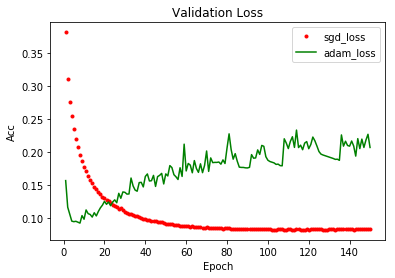

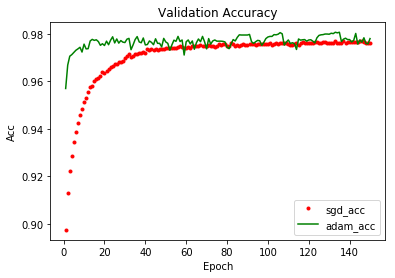

In [165]:
f, ax = plt.subplots()
ax.plot([None] + history.history['val_loss'], '.',c='r')
ax.plot([None] + history2.history['val_loss'], '-',c='g')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['sgd_loss','adam_loss'], loc = 0)
ax.set_title('Validation Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Acc') 

f, ax = plt.subplots()
ax.plot([None] + history.history['val_acc'], '.',c='r')
ax.plot([None] + history2.history['val_acc'], '-',c='g')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['sgd_acc','adam_acc'], loc = 0)
ax.set_title('Validation Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Acc') 


### SWATS

In [166]:
# Initialize model constructor
model3 = Sequential()
# Add layers sequentially
model3.add(Dense(128, input_shape=(784,), use_bias = False))
model3.add(Activation("relu"))
# Third..
#model.add(Dense(128, use_bias = False))
#model.add(Activation("relu"))

model3.add(Dense(10, use_bias = False))
model3.add(Activation("softmax"))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               100352    
_________________________________________________________________
activation_16 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1280      
_________________________________________________________________
activation_17 (Activation)   (None, 10)                0         
Total params: 101,632
Trainable params: 101,632
Non-trainable params: 0
_________________________________________________________________


Epoch 1/2
60000/60000 [==============================] - 6s 94us/step - loss: 0.0125 - acc: 0.9958
Epoch 2/2
60000/60000 [==============================] - 5s 87us/step - loss: 0.0091 - acc: 0.9972
0.001
Epoch 1/2
60000/60000 [==============================] - 5s 89us/step - loss: 0.0088 - acc: 0.9971
Epoch 2/2
60000/60000 [==============================] - 6s 93us/step - loss: 0.0076 - acc: 0.9974
0.001
Epoch 1/2
60000/60000 [==============================] - 6s 92us/step - loss: 0.0072 - acc: 0.9977
Epoch 2/2
60000/60000 [==============================] - 5s 89us/step - loss: 0.0078 - acc: 0.9975
0.001


In [346]:
from keras.legacy import interfaces
from keras.optimizers import Optimizer
from keras import backend as K

class mySGD(Optimizer):

    def __init__(self, lr=0.01, **kwargs):
        super(mySGD, self).__init__(**kwargs)
        with K.name_scope(self.__class__.__name__):
            self.iterations = K.variable(0, dtype='int64', name='iterations')
            self.lr = K.variable(lr, name='lr')

    @interfaces.legacy_get_updates_support
    def get_updates(self, loss, params):

        grads = self.get_gradients(loss, params) 
        self.updates = [K.update_add(self.iterations, 1)] 
        self.weights = [self.iterations] 
        print('param:',len(params))
        for p, g in zip(params, grads):
            print('p:',p.shape)
            print('g:',g.shape)
            print('lr:',self.lr.shape)
            
            new_p = p - self.lr * g
           
            if getattr(p, 'constraint', None) is not None:
                new_p = p.constraint(new_p)
           
            self.updates.append(K.update(p, new_p))

        return self.updates

    def get_config(self):
        config = {'lr': float(K.get_value(self.lr))}
        base_config = super(mySGD, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [226]:
class Adam(Optimizer):
    """Adam optimizer.
    Default parameters follow those provided in the original paper.
    # Arguments
        lr: float >= 0. Learning rate.
        beta_1: float, 0 < beta < 1. Generally close to 1.
        beta_2: float, 0 < beta < 1. Generally close to 1.
        epsilon: float >= 0. Fuzz factor. If `None`, defaults to `K.epsilon()`.
        decay: float >= 0. Learning rate decay over each update.
        amsgrad: boolean. Whether to apply the AMSGrad variant of this
            algorithm from the paper "On the Convergence of Adam and
            Beyond".
    # References
        - [Adam - A Method for Stochastic Optimization](
           https://arxiv.org/abs/1412.6980v8)
        - [On the Convergence of Adam and Beyond](
           https://openreview.net/forum?id=ryQu7f-RZ)
    """

    def __init__(self, lr=0.001, beta_1=0.9, beta_2=0.999,
                 epsilon=None, decay=0., amsgrad=False, **kwargs):
        super(Adam, self).__init__(**kwargs)
        with K.name_scope(self.__class__.__name__):
            self.iterations = K.variable(0, dtype='int64', name='iterations')
            self.lr = K.variable(lr, name='lr')
            self.beta_1 = K.variable(beta_1, name='beta_1')
            self.beta_2 = K.variable(beta_2, name='beta_2')
            self.decay = K.variable(decay, name='decay')
        if epsilon is None:
            epsilon = K.epsilon()
        self.epsilon = epsilon
        self.initial_decay = decay
        self.amsgrad = amsgrad

    @interfaces.legacy_get_updates_support
    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = [K.update_add(self.iterations, 1)]

        lr = self.lr
        if self.initial_decay > 0:
            lr = lr * (1. / (1. + self.decay * K.cast(self.iterations,
                                                      K.dtype(self.decay))))

        t = K.cast(self.iterations, K.floatx()) + 1
        lr_t = lr * (K.sqrt(1. - K.pow(self.beta_2, t)) /
                     (1. - K.pow(self.beta_1, t)))

        ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        if self.amsgrad:
            vhats = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        else:
            vhats = [K.zeros(1) for _ in params]
        self.weights = [self.iterations] + ms + vs + vhats

        for p, g, m, v, vhat in zip(params, grads, ms, vs, vhats):
            m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
            v_t = (self.beta_2 * v) + (1. - self.beta_2) * K.square(g)
            if self.amsgrad:
                vhat_t = K.maximum(vhat, v_t)
                p_t = p - lr_t * m_t / (K.sqrt(vhat_t) + self.epsilon)
                self.updates.append(K.update(vhat, vhat_t))
            else:
                p_t = p - lr_t * m_t / (K.sqrt(v_t) + self.epsilon)

            self.updates.append(K.update(m, m_t))
            self.updates.append(K.update(v, v_t))
            new_p = p_t

            # Apply constraints.
            if getattr(p, 'constraint', None) is not None:
                new_p = p.constraint(new_p)

            self.updates.append(K.update(p, new_p))
        return self.updates

    def get_config(self):
        config = {'lr': float(K.get_value(self.lr)),
                  'beta_1': float(K.get_value(self.beta_1)),
                  'beta_2': float(K.get_value(self.beta_2)),
                  'decay': float(K.get_value(self.decay)),
                  'epsilon': self.epsilon,
                  'amsgrad': self.amsgrad}
        base_config = super(Adam, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [290]:
# Initialize model constructor
model = Sequential()
# Add layers sequentially
model.add(Dense(128, input_shape=(784,), use_bias = False))
model.add(Activation("relu"))
# Third..
#model.add(Dense(128, use_bias = False))
#model.add(Activation("relu"))

model.add(Dense(10, use_bias = False))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer=mySGD(),
              metrics=['accuracy'])
history = model.fit(train_X, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split=0.2)

param: 2
p: (784, 128)
p: (128, 10)
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 7s 154us/step - loss: 0.7343 - acc: 0.8189 - val_loss: 0.3806 - val_acc: 0.8983
Epoch 2/100
48000/48000 [==============================] - 6s 133us/step - loss: 0.3645 - acc: 0.8992 - val_loss: 0.3114 - val_acc: 0.9123
Epoch 3/100
48000/48000 [==============================] - 6s 131us/step - loss: 0.3113 - acc: 0.9130 - val_loss: 0.2765 - val_acc: 0.9228
Epoch 4/100
48000/48000 [==============================] - 6s 119us/step - loss: 0.2797 - acc: 0.9220 - val_loss: 0.2543 - val_acc: 0.9282
Epoch 5/100
48000/48000 [==============================] - 6s 126us/step - loss: 0.2555 - acc: 0.9290 - val_loss: 0.2354 - val_acc: 0.9335
Epoch 6/100
48000/48000 [==============================] - 6s 120us/step - loss: 0.2358 - acc: 0.9350 - val_loss: 0.2219 - val_acc: 0.9370
Epoch 7/100
48000/48000 [==============================] - 6s 123us/step - loss:

Epoch 59/100
48000/48000 [==============================] - 5s 113us/step - loss: 0.0447 - acc: 0.9891 - val_loss: 0.0874 - val_acc: 0.9752
Epoch 60/100
48000/48000 [==============================] - 5s 114us/step - loss: 0.0439 - acc: 0.9894 - val_loss: 0.0872 - val_acc: 0.9748
Epoch 61/100
48000/48000 [==============================] - 5s 114us/step - loss: 0.0432 - acc: 0.9898 - val_loss: 0.0871 - val_acc: 0.9746
Epoch 62/100
48000/48000 [==============================] - 6s 115us/step - loss: 0.0424 - acc: 0.9901 - val_loss: 0.0863 - val_acc: 0.9752
Epoch 63/100
48000/48000 [==============================] - 5s 114us/step - loss: 0.0417 - acc: 0.9902 - val_loss: 0.0861 - val_acc: 0.9745
Epoch 64/100
48000/48000 [==============================] - 6s 117us/step - loss: 0.0409 - acc: 0.9905 - val_loss: 0.0855 - val_acc: 0.9758
Epoch 65/100
48000/48000 [==============================] - 6s 116us/step - loss: 0.0401 - acc: 0.9907 - val_loss: 0.0860 - val_acc: 0.9752
Epoch 66/100
48000/4

In [291]:
# Initialize model constructor
model2 = Sequential()
# Add layers sequentially
model2.add(Dense(128, input_shape=(784,), use_bias = False))
model2.add(Activation("relu"))
# Third..
#model.add(Dense(128, use_bias = False))
#model.add(Activation("relu"))

model2.add(Dense(10, use_bias = False))
model2.add(Activation("softmax"))

model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
history2 = model2.fit(train_X, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 8s 169us/step - loss: 0.2849 - acc: 0.9190 - val_loss: 0.1525 - val_acc: 0.9573
Epoch 2/100
48000/48000 [==============================] - 7s 146us/step - loss: 0.1264 - acc: 0.9633 - val_loss: 0.1139 - val_acc: 0.9668
Epoch 3/100
48000/48000 [==============================] - 7s 149us/step - loss: 0.0875 - acc: 0.9737 - val_loss: 0.0978 - val_acc: 0.9699
Epoch 4/100
48000/48000 [==============================] - 7s 145us/step - loss: 0.0668 - acc: 0.9793 - val_loss: 0.0989 - val_acc: 0.9701
Epoch 5/100
48000/48000 [==============================] - 7s 144us/step - loss: 0.0505 - acc: 0.9846 - val_loss: 0.0961 - val_acc: 0.9722
Epoch 6/100
48000/48000 [==============================] - 7s 145us/step - loss: 0.0408 - acc: 0.9876 - val_loss: 0.0853 - val_acc: 0.9734
Epoch 7/100
48000/48000 [==============================] - 7s 154us/step - loss: 0.0314 - acc: 0.9903 - val_loss: 0.

48000/48000 [==============================] - 8s 157us/step - loss: 0.0045 - acc: 0.9989 - val_loss: 0.1788 - val_acc: 0.9737
Epoch 60/100
48000/48000 [==============================] - 8s 169us/step - loss: 0.0035 - acc: 0.9991 - val_loss: 0.1471 - val_acc: 0.9801
Epoch 61/100
48000/48000 [==============================] - 8s 160us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.1605 - val_acc: 0.9773
Epoch 62/100
48000/48000 [==============================] - 8s 159us/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.1640 - val_acc: 0.9777
Epoch 63/100
48000/48000 [==============================] - 8s 160us/step - loss: 0.0035 - acc: 0.9987 - val_loss: 0.1554 - val_acc: 0.9787
Epoch 64/100
48000/48000 [==============================] - 7s 156us/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.1497 - val_acc: 0.9799
Epoch 65/100
48000/48000 [==============================] - 7s 154us/step - loss: 0.0011 - acc: 0.9996 - val_loss: 0.1776 - val_acc: 0.9764
Epoch 66/100
48000/48000 [=======

In [292]:
# Initialize model constructor
model3 = Sequential()
# Add layers sequentially
model3.add(Dense(128, input_shape=(784,), use_bias = False))
model3.add(Activation("relu"))
# Third..
#model.add(Dense(128, use_bias = False))
#model.add(Activation("relu"))
model3.add(Dense(10, use_bias = False))
model3.add(Activation("softmax"))

model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
history3 = model3.fit(train_X, train_Y_one_hot, epochs = 7, batch_size = 32, validation_split=0.2)
val_loss = history3.history['val_loss']

model3.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
history3_1 = model3.fit(train_X, train_Y_one_hot, epochs = 97, batch_size = 32, validation_split=0.2)
val_loss += history3_1.history['val_loss']

Train on 48000 samples, validate on 12000 samples
Epoch 1/7
48000/48000 [==============================] - 7s 147us/step - loss: 0.2881 - acc: 0.9168 - val_loss: 0.1498 - val_acc: 0.9587
Epoch 2/7
48000/48000 [==============================] - 6s 123us/step - loss: 0.1255 - acc: 0.9638 - val_loss: 0.1273 - val_acc: 0.9616
Epoch 3/7
48000/48000 [==============================] - 7s 148us/step - loss: 0.0864 - acc: 0.9739 - val_loss: 0.0912 - val_acc: 0.9723
Epoch 4/7
48000/48000 [==============================] - 6s 129us/step - loss: 0.0622 - acc: 0.9818 - val_loss: 0.0973 - val_acc: 0.9700
Epoch 5/7
48000/48000 [==============================] - 6s 124us/step - loss: 0.0488 - acc: 0.9855 - val_loss: 0.0845 - val_acc: 0.9735
Epoch 6/7
48000/48000 [==============================] - 6s 130us/step - loss: 0.0383 - acc: 0.9881 - val_loss: 0.1002 - val_acc: 0.9714
Epoch 7/7
48000/48000 [==============================] - 6s 126us/step - loss: 0.0303 - acc: 0.9908 - val_loss: 0.0797 - val_acc

48000/48000 [==============================] - 5s 95us/step - loss: 0.0059 - acc: 0.9994 - val_loss: 0.0748 - val_acc: 0.9783
Epoch 53/97
48000/48000 [==============================] - 5s 96us/step - loss: 0.0059 - acc: 0.9995 - val_loss: 0.0748 - val_acc: 0.9785
Epoch 54/97
48000/48000 [==============================] - 5s 106us/step - loss: 0.0058 - acc: 0.9995 - val_loss: 0.0748 - val_acc: 0.9784
Epoch 55/97
48000/48000 [==============================] - 5s 100us/step - loss: 0.0058 - acc: 0.9995 - val_loss: 0.0749 - val_acc: 0.9787
Epoch 56/97
48000/48000 [==============================] - 5s 99us/step - loss: 0.0057 - acc: 0.9996 - val_loss: 0.0749 - val_acc: 0.9785
Epoch 57/97
48000/48000 [==============================] - 5s 97us/step - loss: 0.0057 - acc: 0.9996 - val_loss: 0.0750 - val_acc: 0.9786
Epoch 58/97
48000/48000 [==============================] - 6s 120us/step - loss: 0.0056 - acc: 0.9995 - val_loss: 0.0752 - val_acc: 0.9785
Epoch 59/97
48000/48000 [==================

In [293]:
# Initialize model constructor
model5 = Sequential()
# Add layers sequentially
model5.add(Dense(128, input_shape=(784,), use_bias = False))
model5.add(Activation("relu"))
# Third..
#model.add(Dense(128, use_bias = False))
#model.add(Activation("relu"))

model5.add(Dense(10, use_bias = False))
model5.add(Activation("softmax"))

model5.compile(loss='categorical_crossentropy',
              optimizer=Adam(amsgrad=True),
              metrics=['accuracy'])
history5 = model5.fit(train_X, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 10s 200us/step - loss: 0.2893 - acc: 0.9188 - val_loss: 0.1577 - val_acc: 0.9549
Epoch 2/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.1325 - acc: 0.9609 - val_loss: 0.1254 - val_acc: 0.9622
Epoch 3/100
48000/48000 [==============================] - 8s 170us/step - loss: 0.0895 - acc: 0.9742 - val_loss: 0.1003 - val_acc: 0.9698
Epoch 4/100
48000/48000 [==============================] - 8s 169us/step - loss: 0.0683 - acc: 0.9800 - val_loss: 0.0912 - val_acc: 0.9726
Epoch 5/100
48000/48000 [==============================] - 8s 169us/step - loss: 0.0535 - acc: 0.9845 - val_loss: 0.0876 - val_acc: 0.9738
Epoch 6/100
48000/48000 [==============================] - 8s 170us/step - loss: 0.0426 - acc: 0.9877 - val_loss: 0.0813 - val_acc: 0.9758
Epoch 7/100
48000/48000 [==============================] - 9s 180us/step - loss: 0.0339 - acc: 0.9906 - val_loss: 0

48000/48000 [==============================] - 6s 131us/step - loss: 6.2963e-04 - acc: 1.0000 - val_loss: 0.0949 - val_acc: 0.9783
Epoch 59/100
48000/48000 [==============================] - 6s 130us/step - loss: 6.1482e-04 - acc: 1.0000 - val_loss: 0.0947 - val_acc: 0.9784
Epoch 60/100
48000/48000 [==============================] - 6s 130us/step - loss: 6.0248e-04 - acc: 1.0000 - val_loss: 0.0950 - val_acc: 0.9784
Epoch 61/100
48000/48000 [==============================] - 7s 153us/step - loss: 5.8949e-04 - acc: 1.0000 - val_loss: 0.0952 - val_acc: 0.9782
Epoch 62/100
48000/48000 [==============================] - 9s 184us/step - loss: 5.7401e-04 - acc: 1.0000 - val_loss: 0.0953 - val_acc: 0.9783
Epoch 63/100
48000/48000 [==============================] - 8s 167us/step - loss: 5.6380e-04 - acc: 1.0000 - val_loss: 0.0957 - val_acc: 0.9782
Epoch 64/100
48000/48000 [==============================] - 7s 155us/step - loss: 5.5201e-04 - acc: 1.0000 - val_loss: 0.0958 - val_acc: 0.9782
Epoch

Text(0,0.5,'loss')

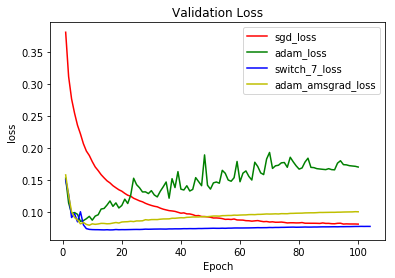

In [486]:
f, ax = plt.subplots()
ax.plot([None] + history.history['val_loss'], '-',c='r')
ax.plot([None] + history2.history['val_loss'], '-',c='g')
ax.plot([None] + val_loss, '-',c='b')
ax.plot([None] + history5.history['val_loss'], '-',c='y')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['sgd_loss','adam_loss','switch_7_loss','adam_amsgrad_loss'], loc = 0)
ax.set_title('Validation Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss') 



### SWATS by designing optimizer

In [482]:
class Swats(Optimizer):
    """Swats optimizer.
    Switch from Adam to SGD.
    """

    def __init__(self, lr=0.001, beta_1=0.9, beta_2=0.999, Swats_on = True,
                 epsilon=None, decay=0., amsgrad=False, **kwargs):
        super(Swats, self).__init__(**kwargs)
        with K.name_scope(self.__class__.__name__):
            self.iterations = K.variable(0, dtype='int64', name='iterations')
            self.lr = K.variable(lr, name='lr')
            self.beta_1 = K.variable(beta_1, name='beta_1')
            self.beta_2 = K.variable(beta_2, name='beta_2')
            self.decay = K.variable(decay, name='decay')
            self.Swats_on = K.variable(Swats_on, name='Swats_on')
        if epsilon is None:
            epsilon = K.epsilon()
        self.epsilon = epsilon
        self.initial_decay = decay
        self.amsgrad = amsgrad
        self.Swats_on = Swats_on

    @interfaces.legacy_get_updates_support
    def get_updates(self, loss, params):        
        grads = self.get_gradients(loss, params)
        self.updates = [K.update_add(self.iterations, 1)]

        lr = self.lr
        if self.initial_decay > 0:
            lr = lr * (1. / (1. + self.decay * K.cast(self.iterations,
                                                      K.dtype(self.decay))))

        t = K.cast(self.iterations, K.floatx()) + 1
        lr_t = lr * (K.sqrt(1. - K.pow(self.beta_2, t)) /
                     (1. - K.pow(self.beta_1, t)))

        ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        lambs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        if self.amsgrad:
            vhats = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        else:
            vhats = [K.zeros(1) for _ in params]
        self.weights = [self.iterations] + ms + vs + vhats

        for p, g, m, v, vhat, lamb in zip(params, grads, ms, vs, vhats, lambs):

            m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
            v_t = (self.beta_2 * v) + (1. - self.beta_2) * K.square(g)
            if self.amsgrad:
                vhat_t = K.maximum(vhat, v_t)
                p_t = p - lr_t * m_t / (K.sqrt(vhat_t) + self.epsilon)
                self.updates.append(K.update(vhat, vhat_t))
            else:
                p_t = p - lr_t * m_t / (K.sqrt(v_t) + self.epsilon)


            self.updates.append(K.update(m, m_t))
            self.updates.append(K.update(v, v_t))

            dp_t = - lr_t * m_t / (K.sqrt(v_t) + self.epsilon)
            dp_t = K.reshape(dp_t,(1,(dp_t.shape[0]*dp_t.shape[1])))
            r_t = K.dot(dp_t,K.transpose(dp_t))/(-K.dot(K.reshape(g,(1,(g.shape[0]*g.shape[1]))), K.transpose(dp_t)))
            print('r_t:',r_t)
            lamb_t = (self.beta_2 * lamb) + (1. - self.beta_2) * r_t       
            self.updates.append(K.update(lamb, lamb_t))

            threshold = K.abs(lamb_t/(1-K.pow(self.beta_2, t)) - r_t)
            #K.print_tensor(K.mean(threshold),message='threshold:')


            #self.Swats_on = K.less(threshold,100)
            ''' if comparision:
                print('Using Adam, epoch:',K.get_value(t))
            else:
                print('Changing to SGD, epoch:',K.get_value(t))
                self.lr = lamb_t/(1-K.pow(self.beta_2, t))
                self.Swats_on = False'''
            '''def execution1(lr):
                print('Using Adam, epoch:',K.get_value(t))
                return K.update(lr, lr)
            def execution2(lr):
                print('Changing to SGD, epoch:',K.get_value(t))
                self.lr = lamb_t/(1-K.pow(self.beta_2, t))
                self.Swats_on = False
                return K.update(lr, lamb_t/(1-K.pow(self.beta_2, t)))
            K.switch(comparision, execution1(lr), execution2(lr))'''
            adam_p = p_t
            sgd_p = p - (self.lr) * g
                        # Apply constraints.
            if getattr(p, 'constraint', None) is not None:
                adam_p = p.constraint(adam_p)
            
            #self.updates.append(K.update(p,adam_p))
            self.updates.append(K.switch(K.less(self.epsilon, K.mean(threshold)), lambda: K.update(p, adam_p), lambda: K.update(p, sgd_p)))
            

        return self.updates

    def get_config(self):
        config = {'lr': float(K.get_value(self.lr)),
                  'beta_1': float(K.get_value(self.beta_1)),
                  'beta_2': float(K.get_value(self.beta_2)),
                  'decay': float(K.get_value(self.decay)),
                  'epsilon': self.epsilon,
                  'amsgrad': self.amsgrad}
        base_config = super(Swats, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [483]:
# Initialize model constructor
model4 = Sequential()
# Add layers sequentially
model4.add(Dense(128, input_shape=(784,), use_bias = False))
model4.add(Activation("relu"))
# Third..
#model.add(Dense(128, use_bias = False))
#model.add(Activation("relu"))

model4.add(Dense(10, use_bias = False))
model4.add(Activation("softmax"))

model4.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
result = model4.fit(train_X, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 13s 270us/step - loss: 0.2904 - acc: 0.9166 - val_loss: 0.1638 - val_acc: 0.9544
Epoch 2/100
48000/48000 [==============================] - 9s 195us/step - loss: 0.1265 - acc: 0.9634 - val_loss: 0.1188 - val_acc: 0.9667
Epoch 3/100
48000/48000 [==============================] - 8s 177us/step - loss: 0.0876 - acc: 0.9741 - val_loss: 0.1108 - val_acc: 0.9645
Epoch 4/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.0643 - acc: 0.9813 - val_loss: 0.0866 - val_acc: 0.9747
Epoch 5/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0497 - acc: 0.9849 - val_loss: 0.0897 - val_acc: 0.9730
Epoch 6/100
48000/48000 [==============================] - 8s 177us/step - loss: 0.0384 - acc: 0.9891 - val_loss: 0.0872 - val_acc: 0.9732
Epoch 7/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0309 - acc: 0.9906 - val_loss: 0

Epoch 59/100
48000/48000 [==============================] - 8s 164us/step - loss: 0.0064 - acc: 0.9982 - val_loss: 0.1721 - val_acc: 0.9748
Epoch 60/100
48000/48000 [==============================] - 8s 166us/step - loss: 0.0012 - acc: 0.9996 - val_loss: 0.1623 - val_acc: 0.9777
Epoch 61/100
48000/48000 [==============================] - 8s 159us/step - loss: 0.0028 - acc: 0.9990 - val_loss: 0.1790 - val_acc: 0.9762
Epoch 62/100
48000/48000 [==============================] - 8s 170us/step - loss: 8.2246e-04 - acc: 0.9998 - val_loss: 0.1596 - val_acc: 0.9782
Epoch 63/100
48000/48000 [==============================] - 8s 168us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.1604 - val_acc: 0.9778
Epoch 64/100
48000/48000 [==============================] - 8s 164us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.1672 - val_acc: 0.9770cc: 0
Epoch 65/100
48000/48000 [==============================] - 8s 162us/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.1681 - val_acc: 0.9769
Epoch 66/10

Text(0,0.5,'loss')

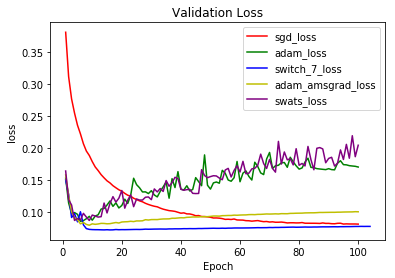

In [484]:
f, ax = plt.subplots()
ax.plot([None] + history.history['val_loss'], '-',c='r')
ax.plot([None] + history2.history['val_loss'], '-',c='g')
ax.plot([None] + val_loss, '-',c='b')
ax.plot([None] + history5.history['val_loss'], '-',c='y')
ax.plot([None] + result.history['val_loss'],'-',c='purple')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['sgd_loss','adam_loss','switch_7_loss','adam_amsgrad_loss','swats_loss'], loc = 0)
ax.set_title('Validation Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss') 

### Experiments

In [435]:
# Initialize model constructor
model0 = Sequential()
# Add layers sequentially
model0.add(Dense(128, input_shape=(784,), use_bias = False))
model0.add(Activation("relu"))
# Third..
#model.add(Dense(128, use_bias = False))
#model.add(Activation("relu"))

model0.add(Dense(10, use_bias = False))
model0.add(Activation("softmax"))

model0.compile(loss='categorical_crossentropy',
              optimizer=mySGD(),
              metrics=['accuracy'])
history0 = model0.fit(train_X, train_Y_one_hot, epochs = 2, batch_size = 32, validation_split=0.2)

param: 2
p: (784, 128)
g: (784, 128)
lr: ()
p: (128, 10)
g: (128, 10)
lr: ()
Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 9s 190us/step - loss: 0.7257 - acc: 0.8178 - val_loss: 0.3788 - val_acc: 0.8991
Epoch 2/2
48000/48000 [==============================] - 6s 135us/step - loss: 0.3600 - acc: 0.9001 - val_loss: 0.3049 - val_acc: 0.9162


In [444]:
weights = model0.get_weights()
print(weights[0].shape)
print(weights[1].shape)

(784, 128)
(128, 10)


In [451]:
outputTensor = model0.output
listOfVariableTensors = model0.trainable_weights

In [452]:
gradients = K.gradients(outputTensor, listOfVariableTensors)